In [1]:
import yt
import numpy as np
from yt.testing import fake_vr_orientation_test_ds

ds = fake_vr_orientation_test_ds()

# now we do volume rendering
sc = yt.create_scene(ds, field='density')
# Change transfer function
tf = yt.ColorTransferFunction((np.log10(0.1), np.log10(1.)))
tf.sample_colormap(np.log10(0.9), 0.01, colormap="spectral")
tf.sample_colormap(np.log10(0.8), 0.01, colormap="spectral")
tf.sample_colormap(np.log10(0.6), 0.01, colormap="spectral")
tf.sample_colormap(np.log10(0.2), 0.01, colormap="spectral")
render_source = sc.get_source(0)
render_source.transfer_function = tf

yt : [INFO     ] 2016-07-25 00:05:07,132 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-07-25 00:05:07,133 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2016-07-25 00:05:07,134 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2016-07-25 00:05:07,135 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2016-07-25 00:05:07,138 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2016-07-25 00:05:07,417 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 00:05:07,419 Creating volume


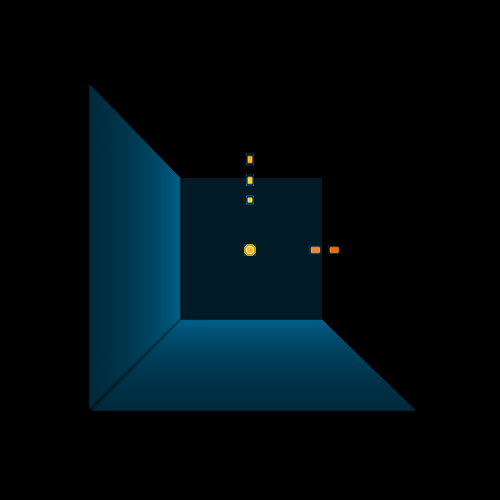

In [2]:
# perspective camera
cam = sc.add_camera(ds, lens_type='perspective')
cam.resolution = (500, 500)
cam.width = ds.arr([2, 2, 1], 'code_length')
cam.position = ds.arr([2.5, 0, 0], 'code_length')
cam.switch_orientation(normal_vector=[-1, 0, 0],
                       north_vector=[0, 0, 1])
sc.render()
sc.show(sigma_clip=6.0)

yt : [INFO     ] 2016-07-25 00:05:18,484 Rendering scene (Can take a while).


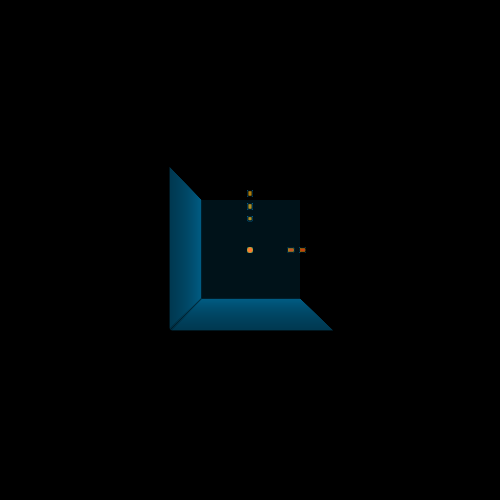

In [3]:
# move cam by one step
cam.position = ds.arr([4, 0, 0], 'code_length')
sc.render()
sc.show(sigma_clip=6.0)

In [4]:
# move cam by several steps
final_position = ds.arr([2.5, 0, 0], 'code_length')
for i in cam.iter_move(final_position, 5):
    sc.save('move_%04d' % i, sigma_clip=6.0)

yt : [INFO     ] 2016-07-25 00:06:37,079 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 00:06:37,805 Saving render move_0000.png
yt : [INFO     ] 2016-07-25 00:06:37,911 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 00:06:38,782 Saving render move_0001.png
yt : [INFO     ] 2016-07-25 00:06:38,897 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 00:06:39,985 Saving render move_0002.png
yt : [INFO     ] 2016-07-25 00:06:40,095 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 00:06:41,492 Saving render move_0003.png
yt : [INFO     ] 2016-07-25 00:06:41,596 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 00:06:43,424 Saving render move_0004.png


yt : [INFO     ] 2016-07-25 01:02:04,672 Rendering scene (Can take a while).


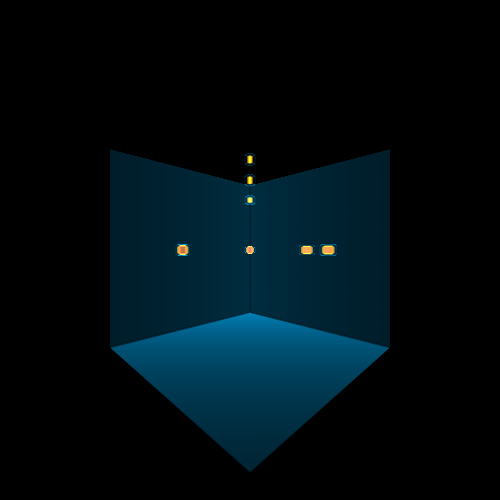

In [5]:
# rotate cam by one step
rot_center = ds.arr([0, 0, 0], 'code_length')
angle = np.pi / 4.
cam.rotate(angle, rot_vector=[0, 0, 1], rot_center=rot_center)
sc.render()
sc.show(sigma_clip=6.0)

In [6]:
# rotate cam by several steps
final_angle = -np.pi / 2.
for i in cam.iter_rotate(final_angle, 5, rot_vector=[-1, 1, 0], rot_center=rot_center):
    sc.save('rotation_%04d' % i, sigma_clip=6.0)

yt : [INFO     ] 2016-07-25 01:02:06,947 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 01:02:09,104 Saving render rotation_0000.png
yt : [INFO     ] 2016-07-25 01:02:09,217 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 01:02:11,441 Saving render rotation_0001.png
yt : [INFO     ] 2016-07-25 01:02:11,558 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 01:02:13,721 Saving render rotation_0002.png
yt : [INFO     ] 2016-07-25 01:02:13,843 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 01:02:15,803 Saving render rotation_0003.png
yt : [INFO     ] 2016-07-25 01:02:15,925 Rendering scene (Can take a while).
yt : [INFO     ] 2016-07-25 01:02:17,852 Saving render rotation_0004.png
